In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import datetime as dt

In [3]:
# 한글 깨짐 현상을 해결
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
with open('../dataset/BIGCON_DATA_ver1.2/SK_DATA.bin', 'rb') as f:
    sk_data = pickle.load(f) 
with open('../dataset/BIGCON_DATA_ver1.2/SH_DATA.bin', 'rb') as f:
    sh_data = pickle.load(f) 
    
# sk 데이터
sk_age = sk_data['SK_AGE']
sk_time = sk_data['SK_TIME']

# sh 데이터
sh_resident = sh_data['SH_RESIDENT']
sh_foreign = sh_data['SH_FOREIGN']

* [sk](#sk)
* [sh](#sh)
* [corr](#corr-함수)
* [main](#main)
* [scatter plot](#scatter-plot)

## Score

In [18]:
formula_1= pd.read_csv('../dataset/wordcloud_formula1.csv')

In [19]:
formula_1= formula_1.rename(columns={'Unnamed: 0': 'DATE'})
formula_1.DATE= formula_1.DATE.astype('datetime64')

In [ ]:
np.round(np.log(np.abs(1+num[1][1]))/ ((i+1)* (np.log10(1/duration)+0.005)),3)

In [56]:
formula_1

,DATE,확진자수,사건해당횟수,사건지속기간
0,2020-02-01,1,0,0
1,2020-02-02,3,0,0
2,2020-02-03,0,0,0
3,2020-02-04,1,0,0
4,2020-02-05,3,0,0
...,...,...,...,...
116,2020-05-27,79,7,2
117,2020-05-28,58,7,3
118,2020-05-29,39,7,4
119,2020-05-30,27,7,5


In [57]:
seoul_score= formula_1.assign(SCORE= np.round(np.log(np.abs(1+formula_1['확진자수'])) / ((formula_1['사건해당횟수']+1)* (np.log10(1/formula_1['사건지속기간'])+0.005)),3))

In [58]:
seoul_score['YO'] = seoul_score['DATE'].map(lambda x: x.weekday())

In [59]:
# 월요일
seoul_score_mon= seoul_score.query('YO==0')
# 화요일
seoul_score_tue= seoul_score.query('YO==1')
# 수요일
seoul_score_wed= seoul_score.query('YO==2')
# 목요일
seoul_score_thu= seoul_score.query('YO==3')
# 금요일
seoul_score_fri= seoul_score.query('YO==4')
# 토요일
seoul_score_sat= seoul_score.query('YO==5')
# 일요일
seoul_score_sun= seoul_score.query('YO==6')

#### sk

In [6]:
# 유동인구 일별 그래프
def sksk(df, flag, code):
    
    if flag:
        sk_s = df.query('(SI_CODE==@code)')
    else:
        sk_s = df
        
    age_col_list = sk_s.columns.values.tolist()
    age_col_list = age_col_list[7:22]

    temp_df = pd.DataFrame(sk_s.groupby(['DATE'])[age_col_list].sum())
    temp_df = temp_df.sum(axis=1)
    temp_df = temp_df.to_frame(name='Popul')
    pop_df = temp_df.reset_index()
    pop_df['YO'] = pop_df['DATE'].map(lambda x: x.weekday())
    
    # 2020년만 해당하도록 함
    pop_20 = pop_df.tail(121)
    
    # 그래프 보고싶으면 주석처리 빼기
#     draw(pop_20, 'DATE', 'Popul')
    
    return pop_20

#### sh

In [7]:
# 매출액 일별 그래프
def shsh(df, flag, code):
    
    if flag:
        sh_s = df.query('(SI_CODE==@code)')
    else:
        sh_s = df
    
    temp_df = pd.DataFrame(sh_s.groupby(['DATE'])['USE_AMT'].sum())
    amt_df = temp_df.reset_index()
    amt_df['YO'] = amt_df['DATE'].map(lambda x: x.weekday())
    
    # 2020년만 해당하도록 함
    amt_20 = amt_df.tail(121)
    
    # 그래프 보고싶으면 주석처리 빼기
#     draw(amt_20, 'DATE', 'USE_AMT')
    
    return amt_20

In [8]:
def draw(df, x_col, y_col):
    label = df[x_col]
    index = range(len(label))

    plt.figure(figsize=(30,10))
    plt.plot(index, df[y_col], '>-')
    plt.xticks(index[::7], label[::7], rotation='45')
    plt.grid(axis='x')
    plt.show()

#### corr 함수

In [9]:
def corr(dataframe, sk_dataframe, sh_dataframe):
    
    # Series로 넣는 경우는 .tolist()가 필요
    # list로 넣는경우는 .tolist() 삭제
    origin = pd.DataFrame({'covid':dataframe.tolist(), 'pop':sk_dataframe.tolist(), 'amt':sh_dataframe.tolist()})
    origin_df = origin.corr()

    plt.figure(figsize=(8,8))

    mask = np.zeros_like(origin_df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(origin_df, annot=True, fmt = '.2f', linewidths=.5, cmap='RdYlBu_r', mask=mask, annot_kws={"fontsize":15})
    plt.show()

### main

In [10]:
# 유동인구 

# 2020년 전체(서울+대구)
total_sk = sksk(sk_age, False, '00')

# 2020년 서울
seoul_sk = sksk(sk_age, True, '11')

# 2020년 대구
daegu_sk = sksk(sk_age, True, '27')

In [11]:
# 매출액

# 2020년 전체(서울+대구)
total_sh = shsh(sh_resident, False, '00')

# 2020년 서울
seoul_sh = shsh(sh_resident, True, '11')

# 2020년 대구
daegu_sh = shsh(sh_resident, True, '27')

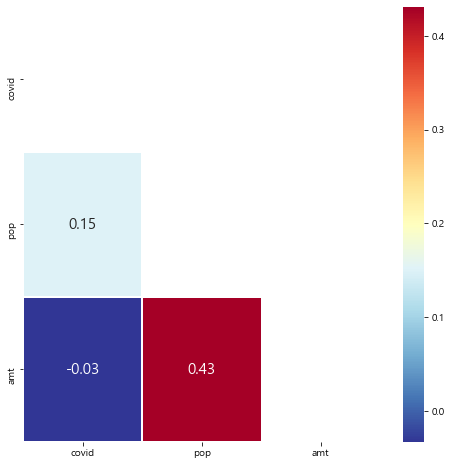

In [60]:
# dataframe = 지표
# sk_dataframe = total_sk / seoul_sk / daegu_sk 
# sh_dataframe = total_sh / seoul_sh / daegu_sh 

corr(seoul_score['SCORE'], seoul_sk['Popul'], seoul_sh['USE_AMT'])

In [51]:
# 서울 유동인구
# 월요일
seoul_sk_mon= seoul_sk.query('YO==0')
# 화요일
seoul_sk_tue= seoul_sk.query('YO==1')
# 수요일
seoul_sk_wed= seoul_sk.query('YO==2')
# 목요일
seoul_sk_thu= seoul_sk.query('YO==3')
# 금요일
seoul_sk_fri= seoul_sk.query('YO==4')
# 토요일
seoul_sk_sat= seoul_sk.query('YO==5')
# 일요일
seoul_sk_sun= seoul_sk.query('YO==6')

In [52]:
# 서울 매출액
# 월요일
seoul_sh_mon= seoul_sh.query('YO==0')
# 화요일
seoul_sh_tue= seoul_sh.query('YO==1')
# 수요일
seoul_sh_wed= seoul_sh.query('YO==2')
# 목요일
seoul_sh_thu= seoul_sh.query('YO==3')
# 금요일
seoul_sh_fri= seoul_sh.query('YO==4')
# 토요일
seoul_sh_sat= seoul_sh.query('YO==5')
# 일요일
seoul_sh_sun= seoul_sh.query('YO==6')

# 요일별 Score

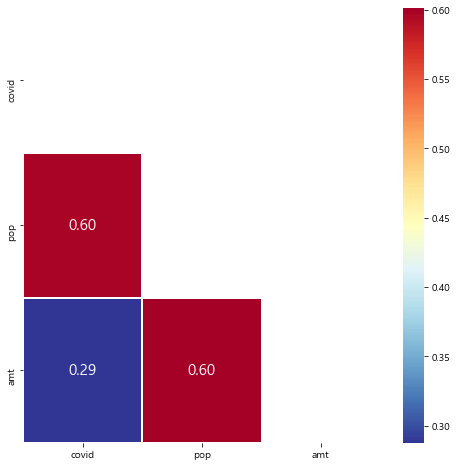

In [61]:
# 월요일
corr(seoul_score_mon['SCORE'], seoul_sk_mon['Popul'], seoul_sh_mon['USE_AMT'])

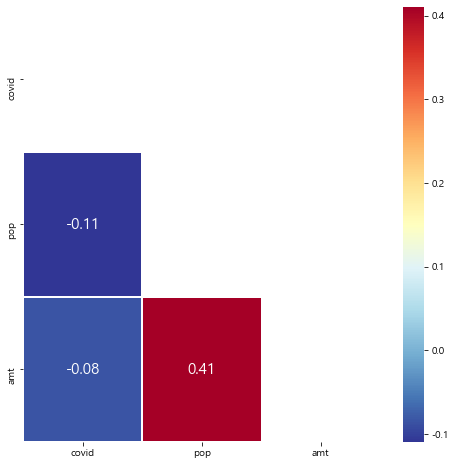

In [64]:
# 화요일
corr(seoul_score_tue['SCORE'], seoul_sk_tue['Popul'], seoul_sh_tue['USE_AMT'])

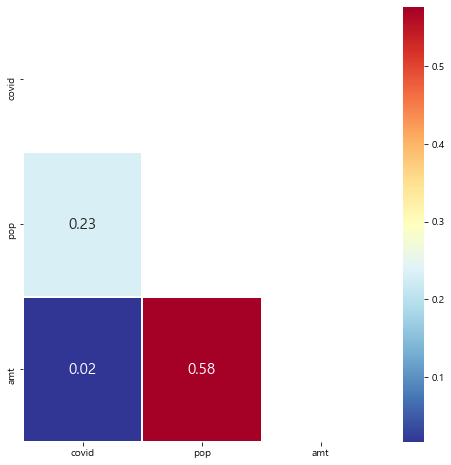

In [65]:
# 수요일
corr(seoul_score_wed['SCORE'], seoul_sk_wed['Popul'], seoul_sh_wed['USE_AMT'])

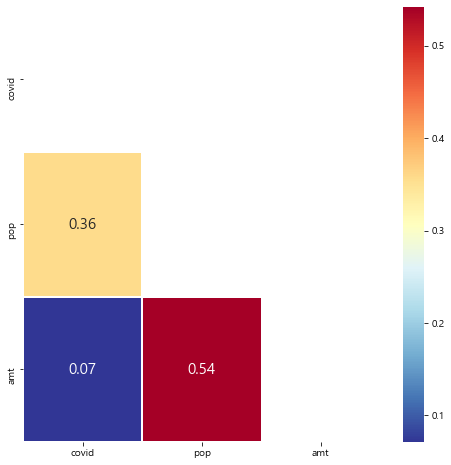

In [66]:
# 목요일
corr(seoul_score_thu['SCORE'], seoul_sk_thu['Popul'], seoul_sh_thu['USE_AMT'])

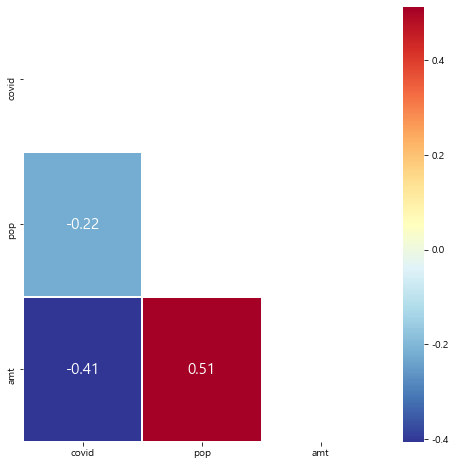

In [67]:
# 금요일
corr(seoul_score_fri['SCORE'], seoul_sk_fri['Popul'], seoul_sh_fri['USE_AMT'])

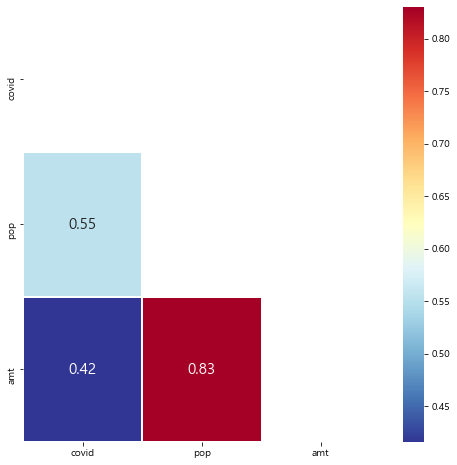

In [70]:
# 토요일
corr(seoul_score_sat['SCORE'], seoul_sk_sat['Popul'], seoul_sh_sat['USE_AMT'])

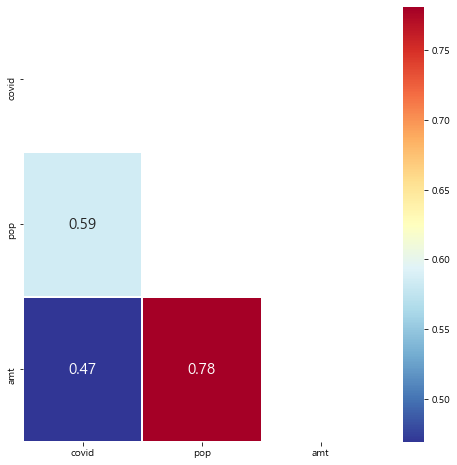

In [71]:
# 일요일
corr(seoul_score_sun['SCORE'], seoul_sk_sun['Popul'], seoul_sh_sun['USE_AMT'])

#### scatter plot

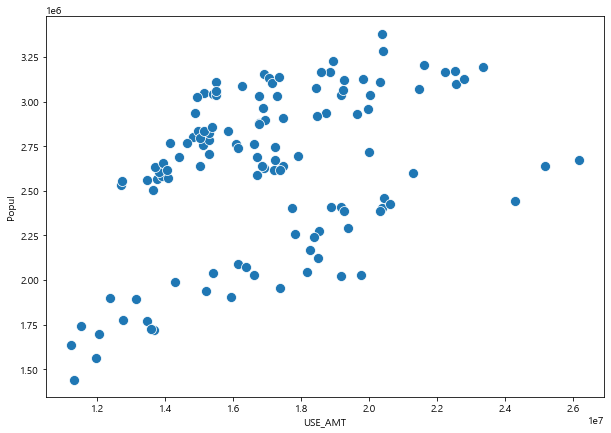

In [15]:
def scatter(df1, df2, x_col, y_col):
    plt.figure(figsize=(10,7))
    df1['DATE'] = df1['DATE'].astype(str)
    df2['DATE'] = df2['DATE'].astype(str)
    
    sns.scatterplot(x=x_col, 
                    y=y_col, 
                    s=100, # marker size
                    data = pd.merge(df1, df2, on='DATE'))

    plt.show()

scatter(seoul_sh, seoul_sk, 'USE_AMT', 'Popul')